<a href="https://colab.research.google.com/github/oanhnguyen-mba/python-usecase-sales-forecasting/blob/main/demo_sales_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

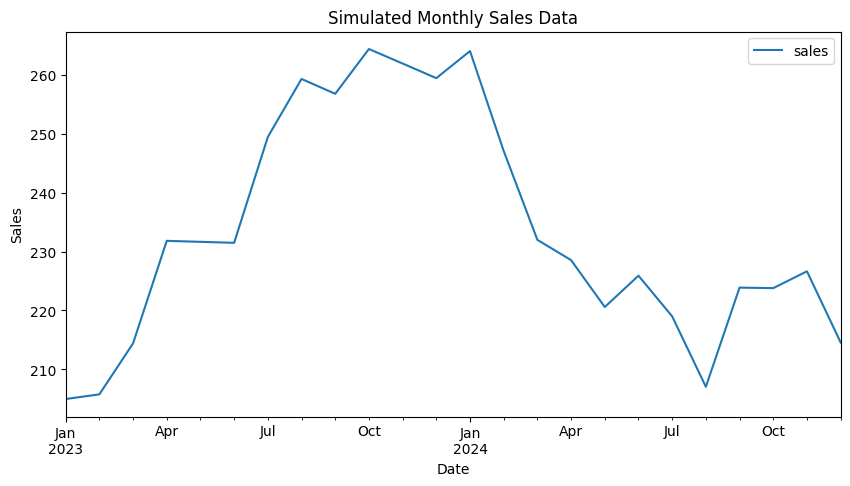

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/tmp/ipython-input-7-4177253012.py:32: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast.index = pd.date_range(start=data.index[-1] + pd.offsets.MonthEnd(), periods=6, freq='M')


Forecasted Sales for next 6 months:
2025-01-31    213.395388
2025-02-28    212.536143
2025-03-31    211.905883
2025-04-30    211.443585
2025-05-31    211.104487
2025-06-30    210.855757
Freq: ME, Name: predicted_mean, dtype: float64


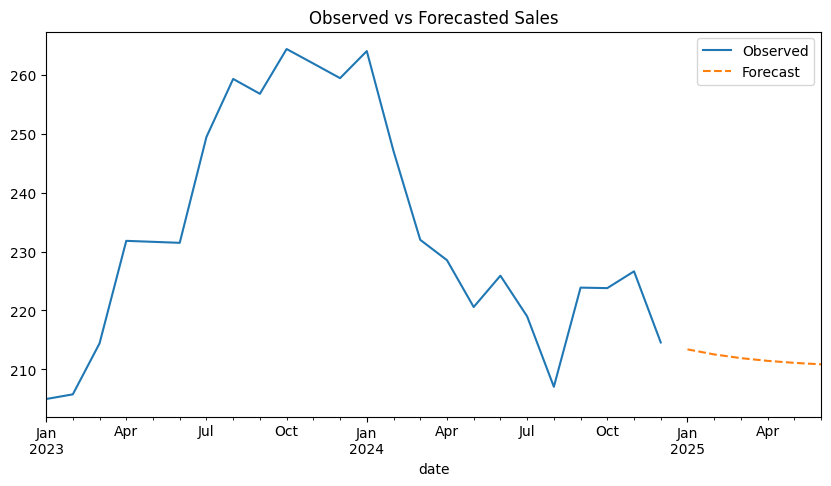

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Generate simulated monthly sales data
np.random.seed(42)
dates = pd.date_range(start='2023-01-01', periods=24, freq='ME')
sales = 200 + np.random.randn(24).cumsum() * 10 + np.linspace(0, 50, 24)  # upward trend
data = pd.DataFrame({'date': dates, 'sales': sales})
data.set_index('date', inplace=True)

# Plot original data
data.plot(figsize=(10,5))
plt.title('Simulated Monthly Sales Data')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

# Fit ARIMA model
model = ARIMA(data['sales'], order=(1,1,1))  # ARIMA(p,d,q)
model_fit = model.fit()

# Forecast next 6 months
forecast = model_fit.forecast(steps=6)
print("Forecasted Sales for next 6 months:")
print(forecast)

# Plot forecast
data['sales'].plot(label='Observed', figsize=(10,5))
forecast.index = pd.date_range(start=data.index[-1] + pd.offsets.MonthEnd(), periods=6, freq='M')
forecast.plot(label='Forecast', style='--')
plt.title('Observed vs Forecasted Sales')
plt.legend()
plt.show()